Missing compiler_cxx fix for MSVCCompiler
Spike times: [  36.9   71.1  105.3  139.5  173.7  207.9  242.1  276.3] ms


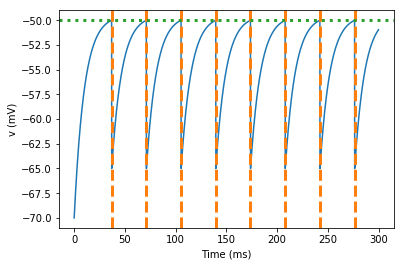

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *

start_scope()


Cm = 2*nfarad
Rm = 5e6*ohm
El = -70*mV
Vl = -50*mV
vr = -65*mV
I = 4.1*namp
eqs = '''
dv/dt = ((El - v) / (Cm*Rm)) + (I/Cm) : volt
'''

start_scope()

G = NeuronGroup(1, eqs, threshold='v>Vl', reset= 'v=vr',  method='euler', dt= 0.1*ms )

G.v = -70*mV # initial value
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(300*ms)

plot(statemon.t/ms, statemon.v[0]/mV)
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(-50, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v (mV)')
print("Spike times: %s" % spikemon.t[:])

